<a href="https://colab.research.google.com/github/danibarselon/Face-Emotion-Recognition/blob/main/soldiery_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Recognition Challenge using Convolutional Neural Network

## Abstract

Recently, I have developed a mobile game, [Best Actor](https://github.com/mikemikezhu/best-actor-ios), which uses computer vision model to recognize facial expressions. Specifically, the mobile game will randomly display a facial expression label (e.g. surprise) to the player. And the player has to mimic the facial expression so as to achieve a high score. Here I have designed a Convolutional Neural Network in order to perform facial expression recognition in the mobile game. This document will discuss the design and implementation details of the computer vision model.

## Computer Vision

### Download Data

Considering that the mobile game relies on computer vision model to make predictions on human facial expressions, we need to download the dataset to train the computer vision model. Here we use FER2013 dataset in [Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) in Kaggle. Therefore, let's configure Kaggle API and download the training dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/danibarselon/Face-Emotion-Recognition.git

Cloning into 'Face-Emotion-Recognition'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 6.02 KiB | 6.02 MiB/s, done.
Resolving deltas: 100% (3/3), done.


### Load Data

The image dataset downloaded from Kaggle is in ".csv" file format. Therefore, we need to load the "train.csv" file, and convert it to numpy array. The training images and labels are saved in "x_train" and "y_train" respectively.

In [ ]:
!python /content/Face-Emotion-Recognition/Segmenting_Data.py

x_train shape: (28709, 48, 48)
y_train shape: (28709,)


In [ ]:
%cd /content/Face-Emotion-Recognition

/content/Face-Emotion-Recognition


In [ ]:
%ls

 Model.py   Preprocess_Data.py   README.md  'sample data'/   Segmenting_Data.py   Train.py


In [ ]:
import matplotlib.pyplot as plt
import numpy
from Segmenting_Data import categories_count

x_train shape: (28709, 48, 48)
y_train shape: (28709,)


**categories** = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')


**Then,we show sample Image**

In [ ]:
from Segmenting_Data import x_train,y_train

Label is: 2


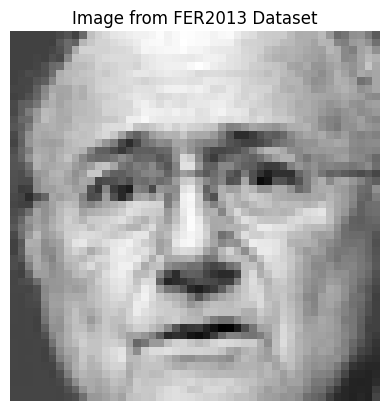

In [ ]:
import matplotlib.pyplot as plt

# Select an image from the training dataset
index = 5
image = x_train[index]
label = y_train[index]

print('Label is: ' + str(label))

# Display the image in grayscale
plt.imshow(image, cmap='gray')
plt.title('Image from FER2013 Dataset')
plt.axis('off') # Hide the axis
plt.show()


### Data Preprocessing

**Test Data=20%,
Train Data=80% **

In [ ]:
!python /content/Face-Emotion-Recognition/Preprocess_Data.py

x_train shape: (28709, 48, 48)
y_train shape: (28709,)
(22967, 48, 48, 1)
(5742, 48, 48, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)


### Train Model

Inspired by the VGGNet architecture, our computer vision model incorporates several layers of convolutions, activation functions, pooling, dense, dropout, and batch normalization techniques. Here's a rephrased breakdown of its layers:
-	Pooling Layers: These reduce image spatial data and extract features by down-sampling. Our model employs Max Pooling with a 3 x 3 pooling size and a 2 x 2 stride.
-	Convolutional Layers: These are fundamental to our model, learning image features by calculating the dot product between weights and small image regions. We adopt a 3 x 3 kernel size across all convolutional layers, similar to VGGNet, and use multiple filters.
-	Activation Functions: We apply ReLU (Rectified Linear Unit) to enhance the network's non-linearity and use a Softmax function to calculate category probabilities.
-	Dense Layers: These fully connected layers collect feature data from previous convolutional layers for decision-making.
-	Dropout Layers: Introduced to mitigate overfitting during model training.
-	Batch Normalization: Utilized to accelerate learning by normalizing the output of the preceding activation layer.

The model's diagram is provided below.


Our model is structured with 5 layers of stacks. Each of the first four stacks consists of two convolutional layers followed by a pooling layer. To expedite training, we incorporate batch normalization, and to mitigate overfitting, we use dropout. Following these, there's a stack of three fully-connected layers, ending with a Softmax activation function that calculates the probabilities of facial expression categories. The model is compiled with the Adam optimizer at a specific learning rate, and for the classification task, we employ sparse_categorical_crossentropy as our loss function.

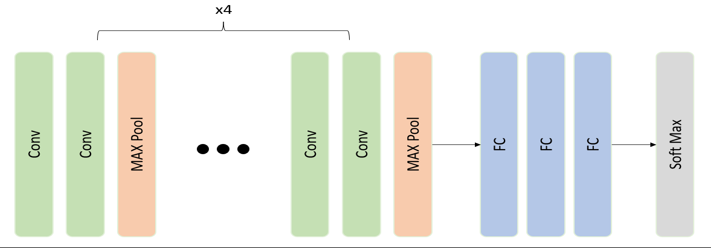

In [ ]:
!python Model.py

2024-02-03 10:56:51.195138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 10:56:51.195207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 10:56:51.196839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 10:56:51.204802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 10:56:52.251114: W tensorflow/compiler/tf2

Next, we will train our model. Here we use Early Stopping strategy, which will stop the training process when there is no improvement in the validation accuracy. Besides, we will also reduce the learning rate by a specific factor if there is a plateau is detected in the validation loss.

In [ ]:
!python Train.py

2024-02-03 07:02:45.958522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 07:02:45.958588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 07:02:45.959963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 07:02:46.947330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Tensorflow version: 2.15.0
2024-02-03 07:02:48.558184: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0

In [ ]:
# Callbacks
from Model import cnn_model
from Preprocess_Data import x_train,x_test,y_train,y_test
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5)

# Train the model
history = cnn_model.fit(x_train,
                        y_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
359/359 [==============================] - 20s 57ms/step - loss: 1.2170 - accuracy: 0.5442 - val_loss: 1.2097 - val_accuracy: 0.5439 - lr: 0.0010
Epoch 2/100
359/359 [==============================] - 20s 56ms/step - loss: 1.1792 - accuracy: 0.5610 - val_loss: 1.2884 - val_accuracy: 0.5153 - lr: 0.0010
Epoch 3/100
359/359 [==============================] - 20s 55ms/step - loss: 1.1475 - accuracy: 0.5786 - val_loss: 1.1589 - val_accuracy: 0.5587 - lr: 0.0010
Epoch 4/100
359/359 [==============================] - 20s 54ms/step - loss: 1.0986 - accuracy: 0.5975 - val_loss: 1.2013 - val_accuracy: 0.5381 - lr: 0.0010
Epoch 5/100
359/359 [==============================] - 20s 54ms/step - loss: 1.0663 - accuracy: 0.6077 - val_loss: 1.1455 - val_accuracy: 0.5799 - lr: 0.0010
Epoch 6/100
359/359 [==============================] - 20s 56ms/step - loss: 1.0327 - accuracy: 0.6232 - val_loss: 1.1100 - val_accuracy: 0.5881 - lr: 0.0010
Epoch 7/100
359/359 [==============================]

After the training process is completed, let's display the accuracy diagram of the training accuracy and validation accuracy.

In [ ]:
%cd /content/Face-Emotion-Recognition/

/content/Face-Emotion-Recognition


In [ ]:
%ls

fa/                        Model.py            __pycache__/  Segmenting_Data.py
Face-Emotion-Recognition/  Preprocess_Data.py  README.md     Train.py


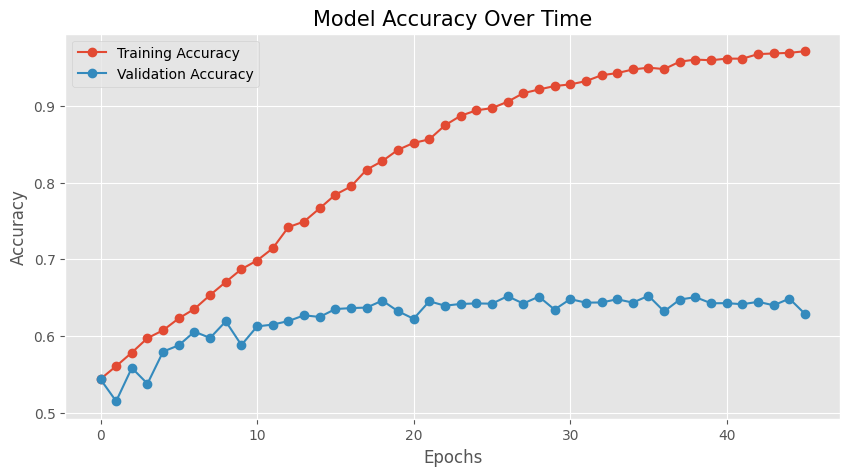

In [ ]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')

# Plot the validation accuracy
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')

# Customize the title and labels
plt.title('Model Accuracy Over Time', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/challenges-in-representation-learning-facial-expression-recognition-challenge/better pretrained model after augmentation/my_model_augmentation.keras')  # if saved as Keras format

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_facial_expression(image_path):
    """Predict facial expression for image"""
    # Open image
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))
    # Convert to array
    rgb_array = image.img_to_array(rgb_image)
    rgb_array = numpy.expand_dims(rgb_array, axis=0)

    # Show image
    rgb_display = numpy.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='gray')
    plt.show()

    # Make predictions
    rgb_array = rgb_array / 255.0
    prediction = cnn_model.predict(rgb_array)

    # Draw the histogram
    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Percentage')
    plt.title('Facial Expression Prediction')
    plt.show()

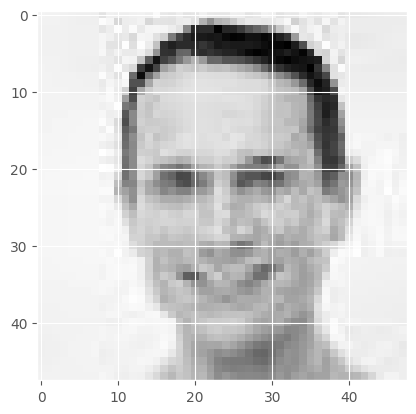

1/1 [==============================] - 2s 2s/step


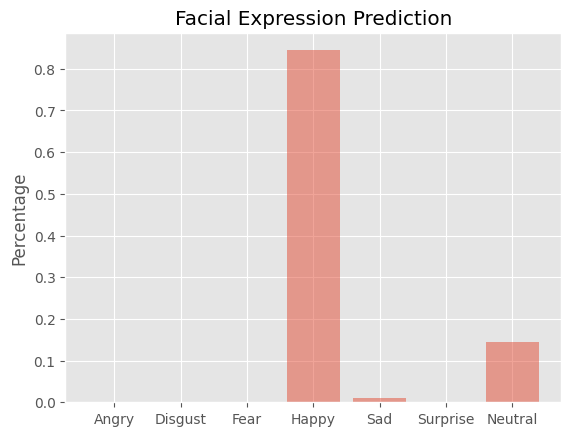

In [ ]:
# Happy
predict_facial_expression('/content/Face-Emotion-Recognition/sample data/images.jpg')

### Evaluate Model

In [ ]:
# Evaluate the model before enhancements
loss_before_improvement, accuracy_before_improvement = cnn_model.evaluate(x_test, y_test)
print(f'Accuracy before improvement: {accuracy_before_improvement}')


180/180 [==============================] - 1s 8ms/step - loss: 2.2210 - accuracy: 0.6289
Accuracy before improvement: 0.6288749575614929


###Better Model

Next, we will improve our model by generating hard data. Specifically, instead of training the model over and over again, we will select the images which are incorrectly labelled by the model, and train the model on these specific images. Therefore, let's use our model to make predictions first, and put the incorrect ones into the array of hard data for further training.

In [ ]:
# Generate hard data
hard_images = []
hard_labels = []

# Make predictions
predictions = cnn_model.predict(x_test)
for i, v in enumerate(predictions):
    y_predict = numpy.argmax(v)
    y_real = y_train[i]
    if y_predict != y_real:
        # If predict incorrectly, append to array
        image = x_train[i]
        hard_image = image.reshape(1, 48, 48, 1)
        hard_images.append(image)
        hard_labels.append(y_real)

x_hard = numpy.array(hard_images)
y_hard = numpy.array(hard_labels)

print(x_hard.shape)
print(y_hard.shape)

(4775, 48, 48, 1)
(4775,)


Next, we will train our model on these specific images which are previously incorrectly labelled by our model.

In [ ]:
# Train the model on hard data
x_hard_train, x_hard_test, y_hard_train, y_hard_test = train_test_split(x_hard, y_hard, test_size=0.2)
history = cnn_model.fit(x_hard_train,
                        y_hard_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_hard_test, y_hard_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Train on 3820 samples, validate on 955 samples
Epoch 1/100
3820/3820 [==============================] - 4s 1ms/sample - loss: 0.1810 - accuracy: 0.9406 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 2/100
3820/3820 [==============================] - 3s 685us/sample - loss: 0.1333 - accuracy: 0.9542 - val_loss: 0.0413 - val_accuracy: 0.9832
Epoch 3/100
3820/3820 [==============================] - 3s 686us/sample - loss: 0.0935 - accuracy: 0.9691 - val_loss: 0.0455 - val_accuracy: 0.9864
Epoch 4/100
3820/3820 [==============================] - 3s 693us/sample - loss: 0.1113 - accuracy: 0.9636 - val_loss: 0.1021 - val_accuracy: 0.9686
Epoch 5/100
3820/3820 [==============================] - 3s 687us/sample - loss: 0.0914 - accuracy: 0.9741 - val_loss: 0.0544 - val_accuracy: 0.9801
Epoch 6/100
3820/3820 [==============================] - 3s 689us/sample - loss: 0.0755 - accuracy: 0.9775 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 7/100
3820/3820 [==============================] - 3s 6

Of course, this might cause the over-fitting issue on these incorrectly labelled images. Therefore, we will train the model again to balance out. Besides, we will also perform data augmentation to diversify our training dataset by rotating, shifting, zooming or flipping the images, which will also improve our model to overcome the over-fitting issue and learn the generic features of each image.

In [ ]:
# Perform data augmentation
data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)
flow = data_generator.flow(x_train,
                           y_train,
                           batch_size=64)

# Train the model again to balance out
history = cnn_model.fit(flow,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

  ...
    to  
  ['...']
Train for 359 steps, validate on 5742 samples
Epoch 1/100
359/359 [==============================] - 17s 46ms/step - loss: 1.1197 - accuracy: 0.6247 - val_loss: 0.9586 - val_accuracy: 0.6606
Epoch 2/100
359/359 [==============================] - 16s 44ms/step - loss: 1.0057 - accuracy: 0.6500 - val_loss: 0.9215 - val_accuracy: 0.6658
Epoch 3/100
359/359 [==============================] - 16s 45ms/step - loss: 0.9738 - accuracy: 0.6624 - val_loss: 0.9442 - val_accuracy: 0.6503
Epoch 4/100
359/359 [==============================] - 16s 45ms/step - loss: 0.9450 - accuracy: 0.6672 - val_loss: 0.9149 - val_accuracy: 0.6649
Epoch 5/100
359/359 [==============================] - 16s 44ms/step - loss: 0.9308 - accuracy: 0.6700 - val_loss: 0.9238 - val_accuracy: 0.6644
Epoch 6/100
359/359 [==============================] - 16s 44ms/step - loss: 0.9182 - accuracy: 0.6749 - val_loss: 0.9165 - val_accuracy: 0.6703
Epoch 7/100
359/359 [==============================] - 16s 

Finally, let's evaluate our model again after improvement. Previously, we have the validation accuracy at around 64%. Nevertheless, the validation accuracy has increased to around **68%**.

In [ ]:
# Evaluate the model after improvement
_, score_after_improvement = cnn_model.evaluate(x_test, y_test)
print('Score after improvement: {}'.format(score_after_improvement))

5742/5742 [==============================] - 2s 261us/sample - loss: 0.9501 - accuracy: 0.6782
Score after improvement: 0.6781609058380127


### Evaluate Model

Next, we will make predictions and create the confusion matrix. Since FER2013 dataset does NOT provide too many images labelled with "Disgust", we can tell from the confusion matrix that, the model might not be able to classify the images labelled with "Disgust" very well.

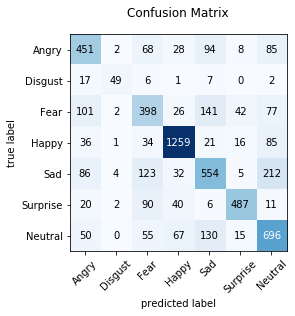

In [ ]:
!pip install -U mlxtend > /dev/null 2>&1

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Make predictions
predictions = cnn_model.predict(x_test)
y_predict = numpy.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Display confusion matrix
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

Then, let's try some other human facial expression images found online.


In [ ]:
# Download into data folder
os.chdir('/content/data')

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ommGLsYSnmX8846iyQigKQfIfvpQzsF0' -O happy.jpg > /dev/null 2>&1
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1I1IjDm9Az4pkDqOz3zcQAguEJ1OsWagt' -O sad.jpg > /dev/null 2>&1
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZLglz_y0QklbYTcwJW1wH0YnAwBn6-1I' -O surprise.jpg > /dev/null 2>&1

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_facial_expression(image_path):
    """Predict facial expression for image"""
    # Open image
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))
    # Convert to array
    rgb_array = image.img_to_array(rgb_image)
    rgb_array = numpy.expand_dims(rgb_array, axis=0)

    # Show image
    rgb_display = numpy.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='gray')
    plt.show()

    # Make predictions
    rgb_array = rgb_array / 255.0
    prediction = cnn_model.predict(rgb_array)

    # Draw the histogram
    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Percentage')
    plt.title('Facial Expression Prediction')
    plt.show()

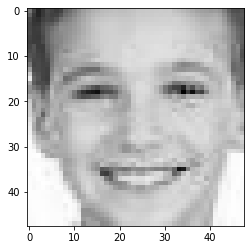

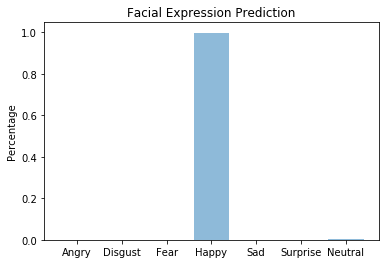

In [ ]:
# Happy
predict_facial_expression('happy.jpg')

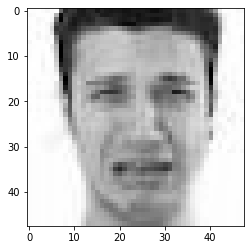

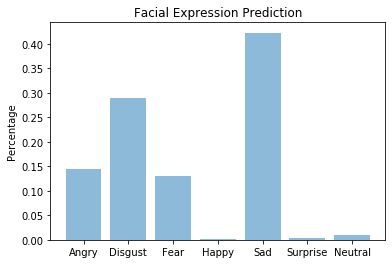

In [ ]:
# Sad
predict_facial_expression('sad.jpg')

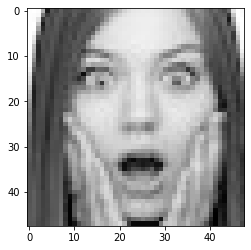

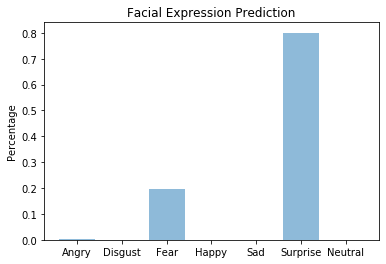

In [ ]:
# Surprise
predict_facial_expression('surprise.jpg')

### Export Model

Last but not least, let's export the model, and save our TensorFlow and TensorFlow Lite model.

In [ ]:
# Create build folder
os.chdir('/content/')
!rm -rf build
!mkdir build
os.chdir('build')
!pwd

/content/build


In [ ]:
# Save tensorflow model
cnn_model.save('FER2013.h5')

In [ ]:
# Save tensorflow lite model
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()
open("FER2013.tflite", "wb").write(tflite_model)

20406252

## Conclusion

To put it in a nutshell, Best Actor is a mobile game which integrates the computer vision technology using Convolutional Neural Network.